<a href="https://colab.research.google.com/github/dimskyy03/air-quality-data-analytics/blob/main/Dicoding_Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Dimas Widianto Ramadhan
- **Email:** pythonic.dimsky03@gmail.com
- **ID Dicoding:** pythonicdimsky03

## Menentukan Pertanyaan Bisnis

- Bagaimana kontribusi faktor cuaca (temperatur, kelembapan, tekanan udara) terhadap distribusi polutan di kota Dongsi?
- Bagaimana opsi peluang bisnis (misalnya, teknologi penyaring udara, aplikasi pemantau kualitas udara) berdasarkan kebutuhan masyarakat Dongsi terkait polusi?
- Bagaimana pengaruh dari kecepatan angin terhadap kualitas udara di Kota Dongsi?



## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df = pd.read_csv('/content/sample_data/PRSA_Data_Dongsi_20130301-20170228.csv')
print(df.head())  # Display the first few rows of the DataFrame

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3  1026.2 -25.5   0.0    N   4.9  Dongsi  
4  1027.1 -24.5   0.0  NNW   3.2  Dongsi  


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight:**
- Dataset memiliki banyak value yang bisa diolah sesuai dengan pertanyaan bisnis, seperti kelembapan, tekanan, dan temperatur. Serta dapat melihat banyak jenis polutan yang dapat kita bandingkan untuk melihat korelasinya.
- Timeframe dari dataset sudah dipisah sedemikian sehingga kita tidak perlu memisahkannya lagi.

### Assessing Data

In [4]:
# Mengecek apakah ada data yang hilang (missing values)
print(df.isnull().sum())

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64


In [5]:
# Menemukan data yang duplikat
print(df.duplicated().sum())

0


In [6]:
# drop unnecessary column to shorten the dataframe

df = df.drop(['station'], axis=1)
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2


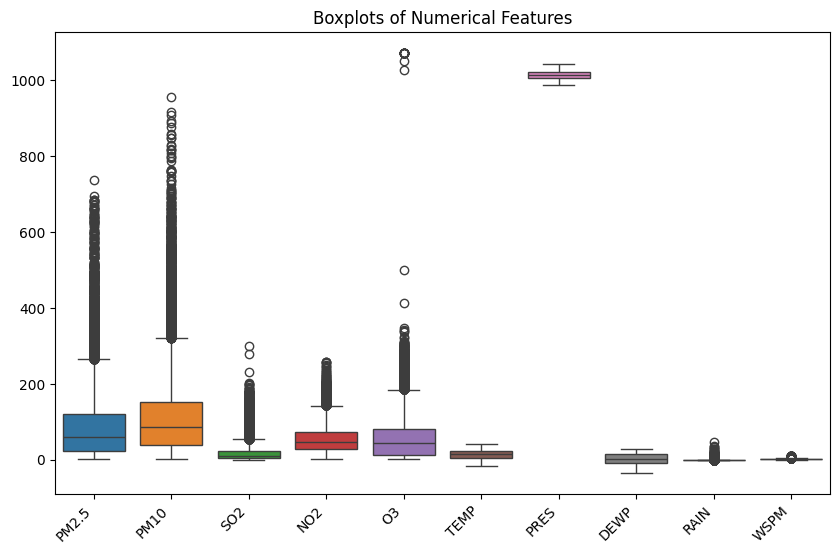

wd
ENE    0.110358
E      0.101869
NE     0.101183
ESE    0.077345
SW     0.070914
NW     0.070485
SSW    0.055822
NNE    0.055108
SE     0.053736
N      0.053307
WSW    0.050563
NNW    0.048391
S      0.044218
SSE    0.040073
WNW    0.038501
W      0.028126
Name: proportion, dtype: float64


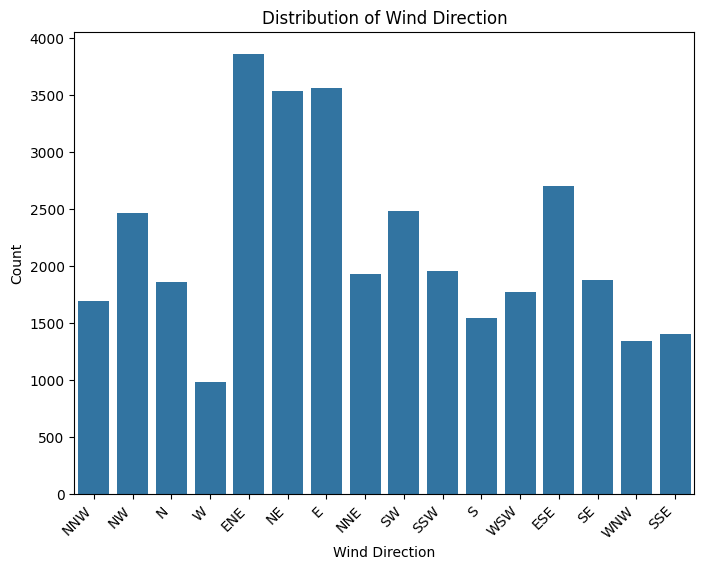

In [7]:

# Check for outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['PM2.5', 'PM10', 'SO2', 'NO2', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']])
plt.xticks(rotation=45, ha='right')
plt.title('Boxplots of Numerical Features')
plt.show()

# Check for bias in categorical features (e.g., 'wd' - wind direction)
print(df['wd'].value_counts(normalize=True)) # Check the distribution of wind direction
plt.figure(figsize=(8, 6))
sns.countplot(x='wd', data=df)
plt.title('Distribution of Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

**Insight:**
- Dataset memiliki cukup banyak missing value di kolom yang dianggap krusial seperti PM2.5 dan PM10, oleh karena itu dapat dilakukan interpolasi data sehingga menghilangkan nilai missing value tersebut.
- Banyak dari kandungan udara tidak memiliki nilai. terlihat pada SO2, NO2, CO, dan O3 yang tidak memiliki nilai sebanyak 900 lebih kolom. Namun hal itu tampak tidak mempengaruhi keseluruhan data yang berjumlah 35 ribu lebih kolom.
- Tidak ada data yang duplikat berdasarkan hasil assesing data.
- Column 'station' tidak diperlukan pada proses analisis data karena kita sudah tahu bahwa data ini merupakan data yang diambil dari stasiun Dongsi.
- Pada beberapa parameter polutan terdapat nilai outlier yang sangat jauh, namun kita asumsikan bahwa nilai outlier tersebut bukan merupakan error dalam pencatatan data karena menurut Air Index Quality, data tersebut bisa diasumsikan sebagai kondisi kualitas udara yang terbilang sangat buruk.

### Cleaning Data

In [8]:
#Interpolasi missing value dengan metode linear interpolation

for col in df.columns:
    if df[col].isnull().any():
        df[col] = df[col].interpolate(method='linear', limit_direction='both')

#filling up wind direction
df['wd'] = df['wd'].fillna(method='ffill')

#Melihat update dari data yang sudah diolah
print(df.isnull().sum())


No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64


<ipython-input-8-987625766051>:5: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df[col] = df[col].interpolate(method='linear', limit_direction='both')
<ipython-input-8-987625766051>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['wd'] = df['wd'].fillna(method='ffill')


In [9]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('cleaned_air_quality_data.csv', index=False)


**Insight:**
- Dataset sudah diinterpolasi sehingga menghilangkan seluruh missing value.
- Untuk wd memiliki nilai data non integer sehingga tidak dapat dilakukan interpolasi. Dengan mengasumsikan nilai arah angin tidak berubah drastis dari data sebelumnya, maka data yang kosong akan diisi dengan nilai dari data sebelumnya.

## Exploratory Data Analysis (EDA)

### Explore ...

Menampilkan parameter statistik dari dataframe.

In [10]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.144243,110.347617,18.506142,53.953078,1331.913045,57.700357,13.668250,1012.551871,2.445126,0.063983,1.860815
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.260246,98.239918,22.954756,34.213245,1169.035307,58.327178,11.459735,10.266471,13.811939,0.786059,1.280427
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,38.000000,3.712800,27.000000,600.000000,13.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,150.000000,24.000000,74.000000,1700.000000,82.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [11]:
pollutant_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
pollutants_df = df[pollutant_columns]

#Melihat statistik deskriptif dari tiap polutan
print(pollutants_df.describe())


              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      86.144243    110.347617     18.506142     53.953078   1331.913045   
std       86.260246     98.239918     22.954756     34.213245   1169.035307   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       23.000000     38.000000      3.712800     27.000000    600.000000   
50%       61.000000     86.000000     10.000000     47.000000   1000.000000   
75%      119.000000    150.000000     24.000000     74.000000   1700.000000   
max      737.000000    955.000000    300.000000    258.000000  10000.000000   

                 O3  
count  35064.000000  
mean      57.700357  
std       58.327178  
min        0.642600  
25%       13.000000  
50%       45.000000  
75%       82.000000  
max     1071.000000  


In [12]:
#Korelasi antara keseluruhan polutan dengan faktor cuaca

correlation_matrix_all = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'RAIN']].corr()

polutant_correlation = correlation_matrix_all.iloc[:6, 6:]

print(polutant_correlation)

           TEMP      PRES      RAIN
PM2.5 -0.138325 -0.005307 -0.019612
PM10  -0.134031 -0.015296 -0.031792
SO2   -0.342115  0.209707 -0.045686
NO2   -0.269052  0.113394 -0.043992
CO    -0.313094  0.148599 -0.015351
O3     0.583826 -0.449326  0.018075


# **IAQ Benchmark**

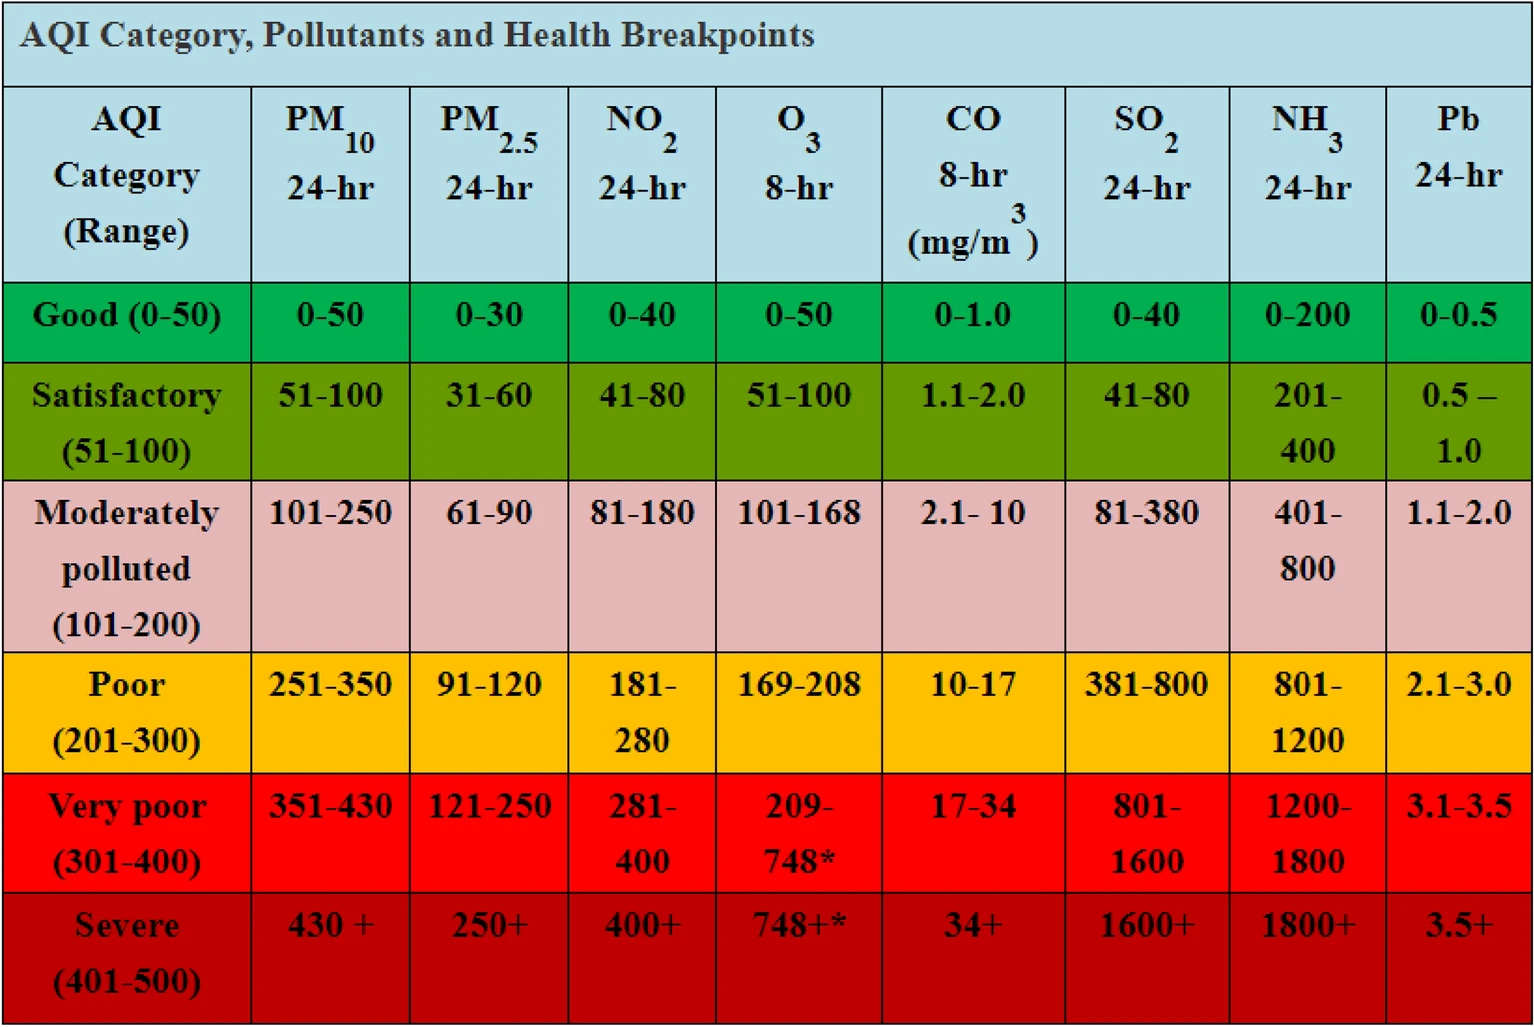

In [13]:
#Melihat rerata tingkat polutan berdasarkan jamnya
hourly_polutants = df.groupby('hour')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean().reset_index()

print(hourly_polutants)

    hour      PM2.5        PM10        SO2        NO2           CO          O3
0      0  96.975201  124.433308  19.006415  63.655025  1485.833271   44.027608
1      1  96.690456  122.053213  19.404612  62.601154  1491.072477   39.652691
2      2  95.212624  119.052470  19.300239  61.687037  1492.772555   33.590642
3      3  92.723544  114.633269  18.960566  60.933450  1335.910937   29.811286
4      4  89.228190  108.739987  18.394911  59.682430  1279.371644   31.376307
5      5  85.319488  103.668357  17.578769  57.671666  1396.886195   28.675349
6      6  82.112110  101.892642  17.015729  57.590552  1413.823059   27.284396
7      7  80.393633  101.411201  17.312694  58.477152  1427.818787   26.368122
8      8  79.706916  102.260720  18.020437  58.828018  1441.714584   28.503810
9      9  79.832658  102.585746  19.255713  56.007845  1406.246601   35.921284
10    10  79.806506  101.692472  20.203709  52.612986  1350.031545   46.430856
11    11  80.387632  101.196128  20.636748  49.18801

In [14]:
#Definisikan batas dari polutan

quality_thresholds = {
    'PM2.5': {'Good': 30, 'Satisfactory': 60, 'Moderately Polluted': 90, 'Unhealthy': 120, 'Very Unhealthy': 250},
    'PM10': {'Good': 50, 'Satisfactory': 100, 'Moderately Polluted': 250, 'Unhealthy': 350, 'Very Unhealthy': 430},
    'SO2': {'Good': 40, 'Satisfactory': 80, 'Moderately Polluted': 380, 'Unhealthy': 800, 'Very Unhealthy': 1600},
    'NO2': {'Good': 40, 'Satisfactory': 80, 'Moderately Polluted': 180, 'Unhealthy': 280, 'Very Unhealthy': 400},
    'CO': {'Good': 1000, 'Satisfactory': 2000, 'Moderately Polluted': 10000, 'Unhealthy': 17000, 'Very Unhealthy': 34000},
    'O3': {'Good': 50, 'Satisfactory': 100, 'Moderately Polluted': 168, 'Unhealthy': 208, 'Very Unhealthy': 748}
}


def get_pollutant_quality(value, pollutant):
    thresholds = quality_thresholds.get(pollutant)
    if thresholds:
        if value <= thresholds['Good']:
            return 'Good'
        elif value <= thresholds['Satisfactory']:
            return 'Satisfactory'
        elif value <= thresholds['Moderately Polluted']:
            return 'Moderately Polluted'
        elif value <= thresholds['Unhealthy']:
            return 'Unhealthy'
        elif value <= thresholds['Very Unhealthy']:
            return 'Very Unhealthy'
        else:
            return 'Hazardous'
    else:
        return 'Unknown'

#List jumlah kualitas udarannya
sum_quality = {'Good':0, 'Satisfactory':0, 'Moderately Polluted':0, 'Unhealthy':0, 'Very Unhealthy':0, 'Hazardous': 0}

for index, row in hourly_polutants.iterrows():
    print(f"Hour: {index}")
    for pollutant in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
        quality = get_pollutant_quality(row[pollutant], pollutant)
        if quality in sum_quality:
            sum_quality[quality] += 1
        print(f"  {pollutant}: {row[pollutant]} ({quality})")

print(sum_quality)

Hour: 0
  PM2.5: 96.97520125741632 (Unhealthy)
  PM10: 124.43330801537624 (Moderately Polluted)
  SO2: 19.00641483477929 (Good)
  NO2: 63.655025175985415 (Satisfactory)
  CO: 1485.8332708155365 (Satisfactory)
  O3: 44.027608378533785 (Good)
Hour: 1
  PM2.5: 96.69045607787578 (Unhealthy)
  PM10: 122.05321299815968 (Moderately Polluted)
  SO2: 19.40461193386451 (Good)
  NO2: 62.60115448053093 (Satisfactory)
  CO: 1491.0724772645035 (Satisfactory)
  O3: 39.65269051945584 (Good)
Hour: 2
  PM2.5: 95.21262397157277 (Unhealthy)
  PM10: 119.0524700229235 (Moderately Polluted)
  SO2: 19.300239377462614 (Good)
  NO2: 61.68703692219712 (Satisfactory)
  CO: 1492.772555262638 (Satisfactory)
  O3: 33.59064192800279 (Good)
Hour: 3
  PM2.5: 92.72354386161928 (Unhealthy)
  PM10: 114.63326937029741 (Moderately Polluted)
  SO2: 18.960565611843293 (Good)
  NO2: 60.93344963992995 (Satisfactory)
  CO: 1335.910936979215 (Satisfactory)
  O3: 29.811285666004462 (Good)
Hour: 4
  PM2.5: 89.22818951027863 (Modera

Menentukan rerata kualitas udara tiap jam

In [15]:
#Membuat dictionary kosong
data = {'hour': []}
for pollutant in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
    data[pollutant] = []

for index, row in hourly_polutants.iterrows():
    data['hour'].append(index)  # Add the hour to the 'hour' column
    for pollutant in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
        quality = get_pollutant_quality(row[pollutant], pollutant)
        data[pollutant].append(quality)  # Add the air quality to the corresponding pollutant column

#Membuat dataframe kualitas udara yang baru
pollutant_quality_df = pd.DataFrame(data)

pollutant_quality_df


,hour,PM2.5,PM10,SO2,NO2,CO,O3
0,0,Unhealthy,Moderately Polluted,Good,Satisfactory,Satisfactory,Good
1,1,Unhealthy,Moderately Polluted,Good,Satisfactory,Satisfactory,Good
2,2,Unhealthy,Moderately Polluted,Good,Satisfactory,Satisfactory,Good
3,3,Unhealthy,Moderately Polluted,Good,Satisfactory,Satisfactory,Good
4,4,Moderately Polluted,Moderately Polluted,Good,Satisfactory,Satisfactory,Good
5,5,Moderately Polluted,Moderately Polluted,Good,Satisfactory,Satisfactory,Good
6,6,Moderately Polluted,Moderately Polluted,Good,Satisfactory,Satisfactory,Good
7,7,Moderately Polluted,Moderately Polluted,Good,Satisfactory,Satisfactory,Good
8,8,Moderately Polluted,Moderately Polluted,Good,Satisfactory,Satisfactory,Good
9,9,Moderately Polluted,Moderately Polluted,Good,Satisfactory,Satisfactory,Good


Mencari distribusi rata-rata kecepatan angin tiap jam

In [16]:
wind_speed = df.groupby('hour')['WSPM'].mean()
wind_speed

,WSPM
hour,
0,1.503217
1,1.445243
2,1.390486
3,1.342174
4,1.309742
5,1.326660
6,1.388136
7,1.527880
8,1.682683


In [17]:
#Korelasi antara keseluruhan polutan dengan kecepatan angin

correlation_matrix_all = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM']].corr()

polutant_correlation_wind = correlation_matrix_all.iloc[:6,6:]

print(polutant_correlation_wind)


           WSPM
PM2.5 -0.301284
PM10  -0.195188
SO2   -0.168223
NO2   -0.483926
CO    -0.319895
O3     0.285827


## Visualization & Explanatory Analysis

### Pertanyaan 1:

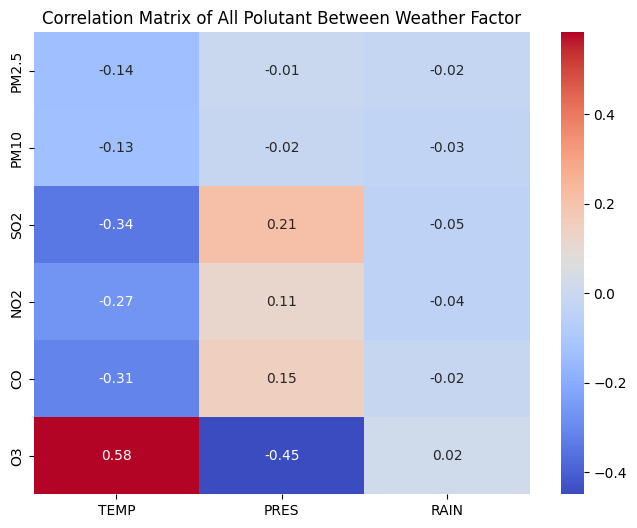

In [18]:
# Visualisai Korelasi terhadap faktor cuaca menggunakan heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(polutant_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Polutant Between Weather Factor')
plt.show()

**Insight:**
- Hujan tidak mempengaruhi nilai polutan yang ada pada wilayah tersebut.
- Suhu dan tekanan mempengaruhi nilai ozon yang ada pada daerah tersebut.
- Suhu juga cukup mempengaruhi polutan lain seperti CO, NO2, dan SO2 yang ada pada wilayah tersebut.

### Pertanyaan 2:

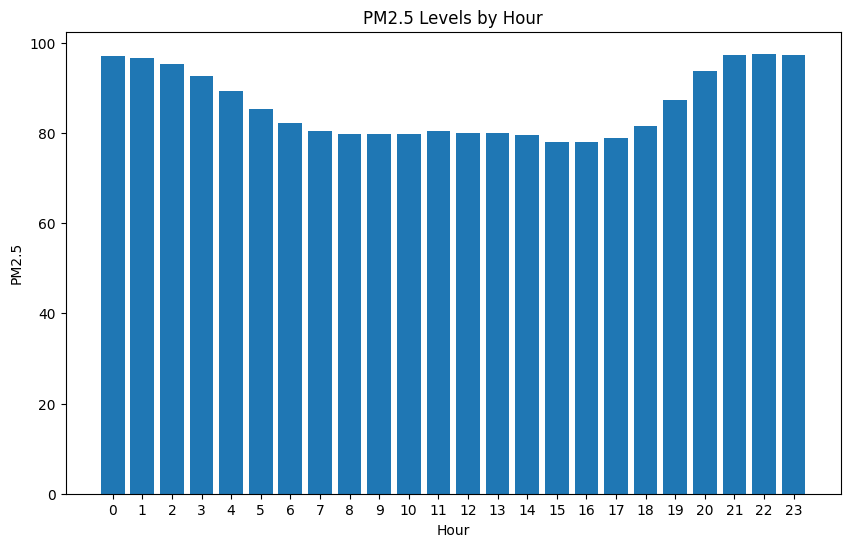

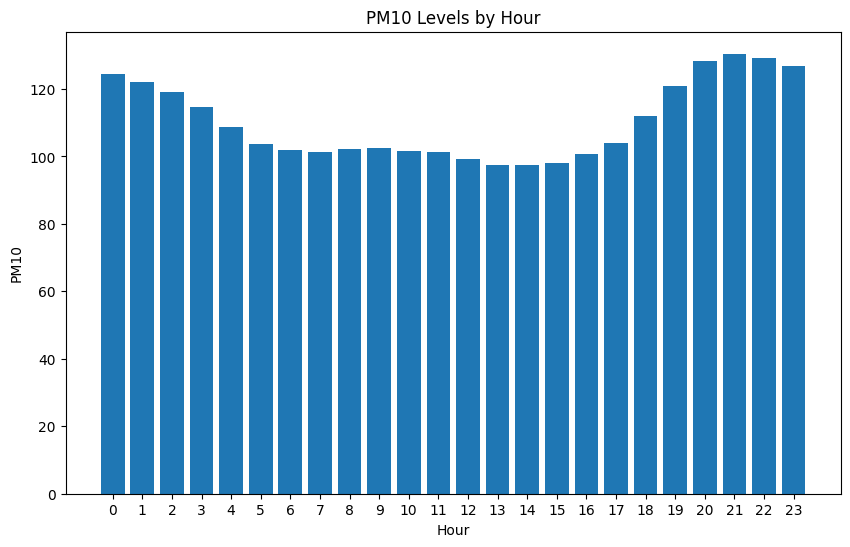

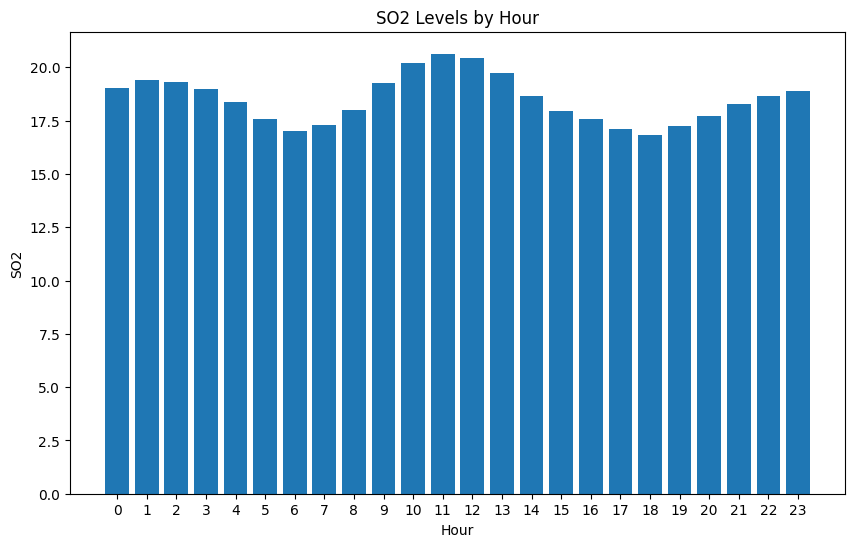

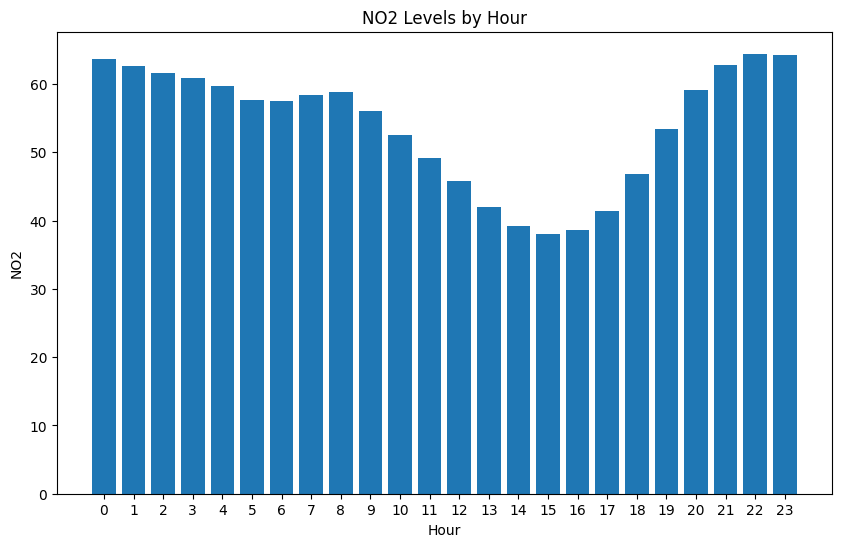

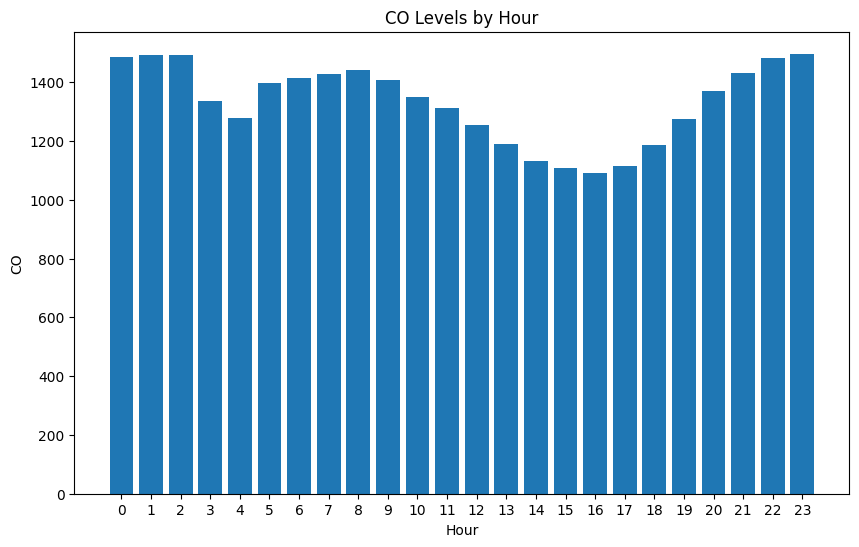

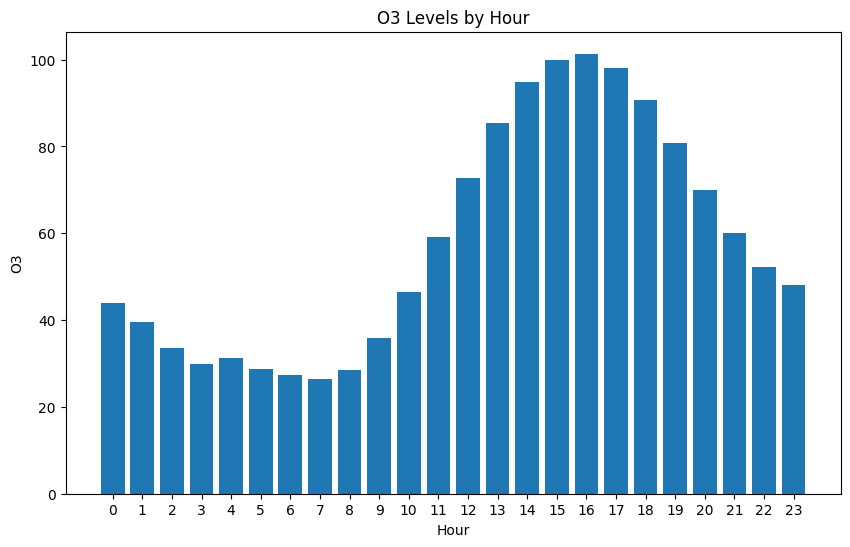

In [19]:
# Assuming 'hourly_polutants' DataFrame is already created as in your provided code

# Create multiple bar graphs
for pollutant in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.bar(hourly_polutants['hour'], hourly_polutants[pollutant])
    plt.xlabel('Hour')
    plt.ylabel(pollutant)
    plt.title(f'{pollutant} Levels by Hour')
    plt.xticks(range(0,24))
    plt.show()


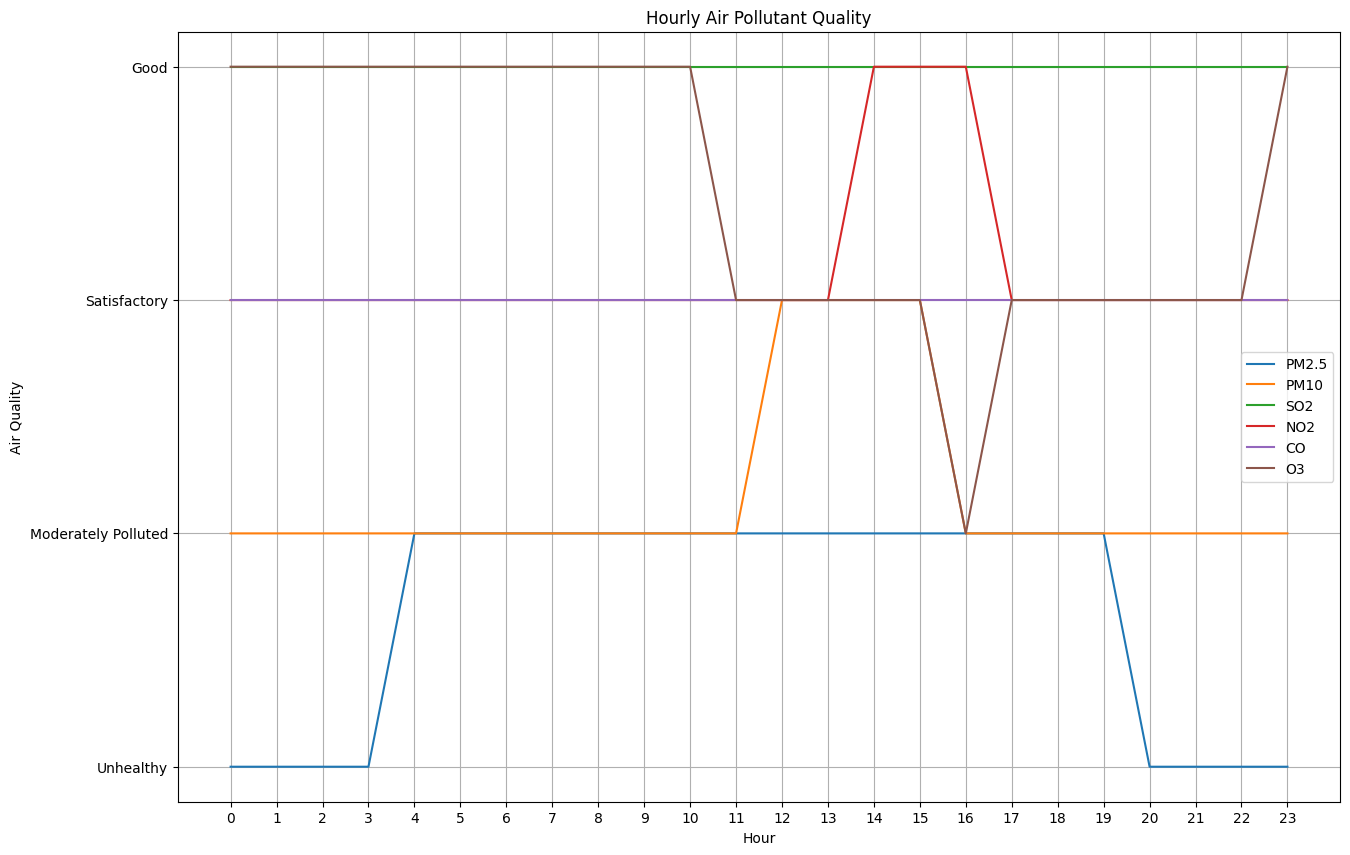

In [20]:
#Membuat plot untuk melihat sebaran kualitas udara tiap jamnya

plt.figure(figsize=(15, 10))
for pollutant in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
    plt.plot(pollutant_quality_df['hour'], pollutant_quality_df[pollutant], label=pollutant)

plt.xlabel('Hour')
plt.ylabel('Air Quality')
plt.title('Hourly Air Pollutant Quality')
plt.xticks(range(0, 24))  # Set x-axis ticks to display all hours
plt.legend()
plt.grid(True)
plt.show()


**Insight:**
- Untuk PM2.5 sering terjadi peningkatan polusi di jam-jam tertentu (terutama jam 00:00 hingga 03:00 dan 20:00 hingga 23:00) dan hampir setiap jam berada pada tingkat Unhealthy dan Moderately Polluted.
- Polutan lain berada pada rentang kualitas udara yang bagus, kecuali untuk O3 yang kandungan polutannya meningkat pada siang-sore hari (jam 16:00).

### Pertanyaan 3:

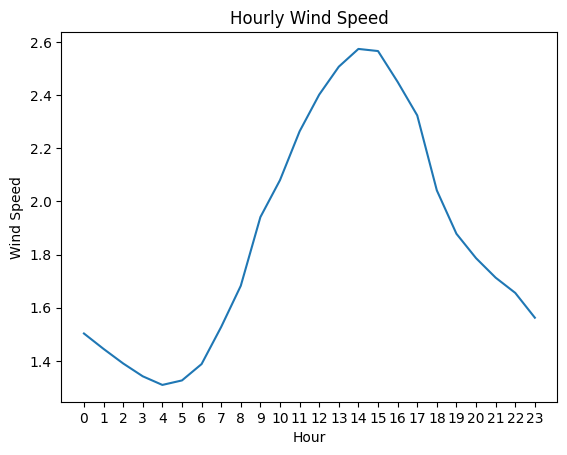

In [21]:
plt.plot(wind_speed.index, wind_speed.values)
plt.xlabel('Hour')
plt.ylabel('Wind Speed')
plt.title('Hourly Wind Speed')
plt.xticks(range(0, 24))  # Set x-axis ticks to display all hours

plt.show()

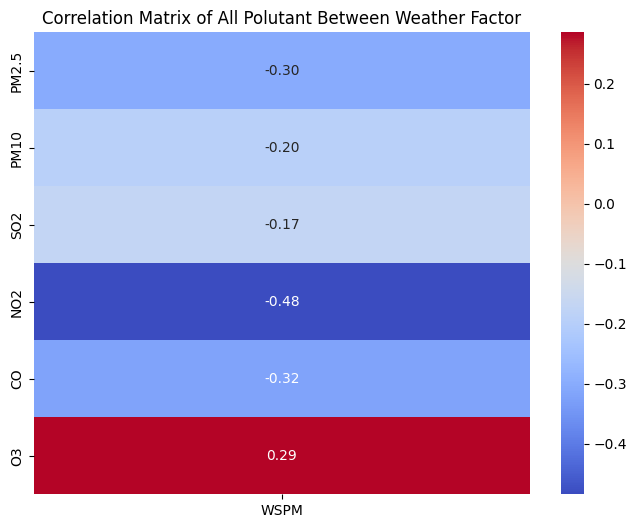

In [22]:
# Visualisai Korelasi terhadap kecepatan angin menggunakan heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(polutant_correlation_wind, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Polutant Between Weather Factor')
plt.show()

**Insight:**
- Kecepatan angin cenderung meningkat ketika pagi hingga puncaknya berada pada siang hari, kemudian turun menjelang sore hari.
- Kecepatan angin cukup mempengaruhi sebagian besar polutan karena memiliki nilai korelasi yang cukup tinggi, kecuali pada PM10 dan SO2 yang memiliki nilai korelasi kecil.

## Conclusion

- Faktor eksternal cuaca seperti temperatur, kelembapan, dan tekanan udara memiliki korelasi yang cukup mempengaruhi banyaknya polutan pada kota Dongsi, sehingga tetap perlu perhatian dari pemerintah kota Dongsi untuk mengontrol kadar polutan yang masuk.
- Kadar polutan PM2.5 dan PM10 memiliki rata-rata nilai kualitas yang terbilang tidak sehat dan cukup banyak polusi berdasarkan standar AQI Dunia. Sehingga diperlukan teknologi yang mumpuni untuk menyaring udara atau membuat aplikasi pemantau kualitas udara di kota Dongsi. Prospek bisnis terkait 2 hal tersebut sangat menjanjikan untuk dieksekusi.
- Polutan dominan memiliki jumlah yang lebih tinggi pada jam malam (20:00 - 23:00) hingga menjelang pagi (00:00 - 03:00), oleh karena itu penggunaan penyaring udara sangat berguna di jam-jam tersebut untuk meminimalisir kualitas udara di wilayah Dongsi.
- Kecepatan angin cukup mempengaruhi sebaran polutan yang berada pada kota Dongsi. Semakin sedikit kecepatan angin dapat membuat polutan terkonsentrasi pada tempat tertentu dan menyebabkan polusi di wilayah tersebut.